In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

from evaluation_metrics import false_positive, true_positive, false_negative, true_negative, accuracy_v2, precision, recall, fpr, tpr, log_loss, macro_precision, micro_precision, weighted_precision

In [2]:
l1 = [0, 1, 1, 1, 0, 0, 0, 1]
l2 = [0, 1, 0, 1, 0, 1, 0, 0]

In [3]:
true_positive(l1, l2), false_positive(l1, l2), false_negative(l1, l2), true_negative(l1, l2)

(2, 1, 2, 3)

In [4]:
accuracy_v2(l1, l2), metrics.accuracy_score(l1, l2)

(0.625, 0.625)

In [5]:
y_true = [0,0,0,1,0,0,0,0,0,0,
1,0,0,0,0,0,0,0,1,0]

y_pred = [0.02638412, 0.11114267, 0.31620708,
 0.0490937, 0.0191491, 0.17554844,
 0.15952202, 0.03819563, 0.11639273,
 0.079377, 0.08584789, 0.39095342,
0.27259048, 0.03447096, 0.04644807,
 0.03543574, 0.18521942, 0.05934905,
0.61977213, 0.33056815]

In [10]:
precisions = []
recalls = []

thresholds = [0.0490937 , 0.05934905, 0.079377, 
 0.08584789, 0.11114267, 0.11639273, 
 0.15952202, 0.17554844, 0.18521942, 
 0.27259048, 0.31620708, 0.33056815, 
 0.39095342, 0.61977213]

for i in thresholds:
    temp_prediction = [1 if x > 1 else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

ZeroDivisionError: division by zero

### TPR / FRP and ROC Curve

In [11]:
tpr_list = []
fpr_list = []

# actual targets
y_true = [0, 0, 0, 0, 1, 0, 1, 
 0, 0, 1, 0, 1, 0, 0, 1]

y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 
 0.85, 0.15, 0.99]

 # handmade thresholds

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

In [12]:
# loop over all thresholds

for thresh in thresholds:
    # calculate predictions for a given threshold
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    # calculate tpr
    temp_tpr = tpr(y_true, temp_pred)
    # calculate fpr
    temp_fpr = fpr(y_true, temp_pred)

    # append tpr and fpr to list
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

In [13]:
fpr_list

[1.0, 0.9, 0.7, 0.6, 0.3, 0.3, 0.2, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0]

In [14]:
tpr_list

[1.0, 1.0, 1.0, 0.8, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.0]

In [15]:
import matplotlib.pyplot as plt

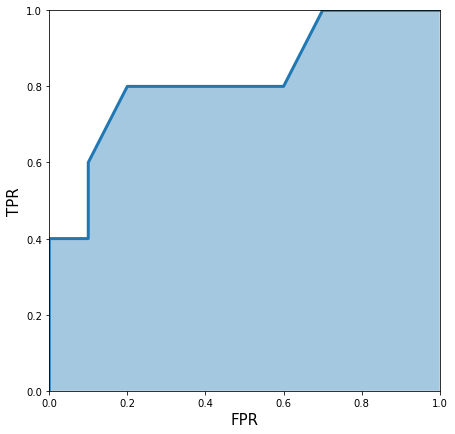

In [16]:
plt.figure(figsize=[7,7])

plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)

plt.show()

In [17]:
metrics.roc_auc_score(y_true, y_pred)

0.8300000000000001

### Log Loss

In [18]:
y_true = [0, 0, 0, 0, 1, 0, 1,
0, 0, 1, 0, 1, 0, 0, 1]

y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
 0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
 0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [19]:
metrics.log_loss(y_true, y_proba)

0.49882711861432294

### Macro, Micro, and Weighted Precisions

In [2]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

macro_precision(y_true, y_pred), metrics.precision_score(y_true, y_pred, average="macro")

(0.3611111111111111, 0.3611111111111111)

In [3]:
micro_precision(y_true, y_pred), metrics.precision_score(y_true, y_pred, average="micro")

(0.4444444444444444, 0.4444444444444444)

In [4]:
weighted_precision(y_true, y_pred), metrics.precision_score(y_true, y_pred, average="weighted")

(0.39814814814814814, 0.39814814814814814)